In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
#from downloads
df = pd.read_excel(r'C:\Users\RiRi\Downloads\Task 3 and 4_Loan_Data.xlsx')
df.head(5)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


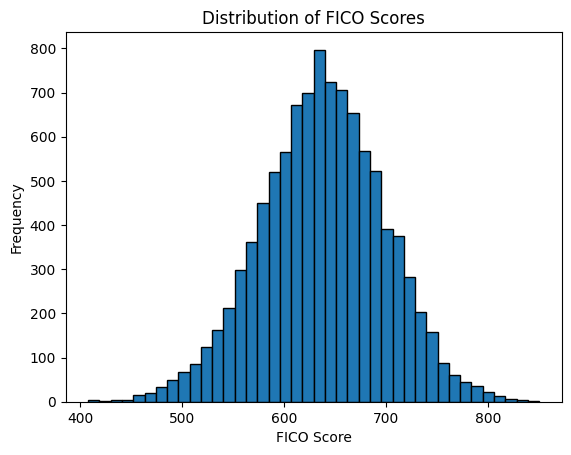

In [10]:
plt.hist(df['fico_score'], bins=40, edgecolor='k')
plt.xlabel('FICO Score')
plt.ylabel('Frequency')
plt.title('Distribution of FICO Scores')
plt.show()

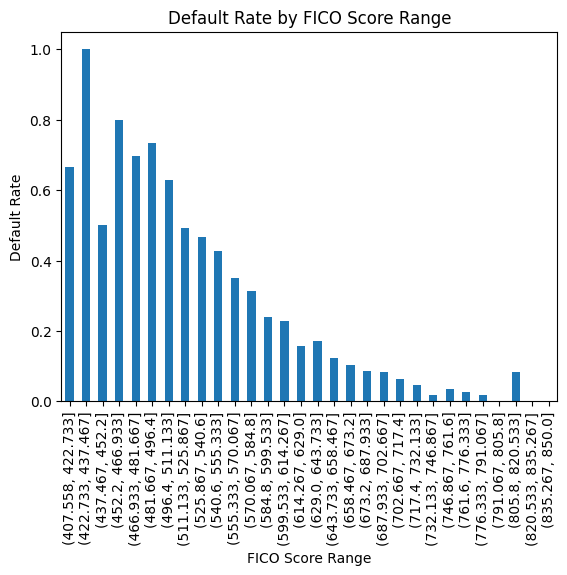

In [15]:
# how different ranges of FICO scores relate to default
# Group by FICO ranges and calculate default rate
fico_bins = pd.cut(df['fico_score'], bins=30)
default_rate_by_fico = df.groupby(fico_bins)['default'].mean()

default_rate_by_fico.plot(kind='bar')
plt.xlabel('FICO Score Range')
plt.ylabel('Default Rate')
plt.title('Default Rate by FICO Score Range')
plt.show()
# Higher more risky


In [16]:
print(default_rate_by_fico)

fico_score
(407.558, 422.733]    0.666667
(422.733, 437.467]    1.000000
(437.467, 452.2]      0.500000
(452.2, 466.933]      0.800000
(466.933, 481.667]    0.696970
(481.667, 496.4]      0.734375
(496.4, 511.133]      0.628866
(511.133, 525.867]    0.492308
(525.867, 540.6]      0.466981
(540.6, 555.333]      0.427673
(555.333, 570.067]    0.350679
(570.067, 584.8]      0.314387
(584.8, 599.533]      0.239071
(599.533, 614.267]    0.227924
(614.267, 629.0]      0.158498
(629.0, 643.733]      0.170996
(643.733, 658.467]    0.122324
(658.467, 673.2]      0.104213
(673.2, 687.933]      0.085754
(687.933, 702.667]    0.082540
(702.667, 717.4]      0.063618
(717.4, 732.133]      0.046703
(732.133, 746.867]    0.018018
(746.867, 761.6]      0.034247
(761.6, 776.333]      0.026316
(776.333, 791.067]    0.016667
(791.067, 805.8]      0.000000
(805.8, 820.533]      0.083333
(820.533, 835.267]    0.000000
(835.267, 850.0]      0.000000
Name: default, dtype: float64


In [49]:
from sklearn.preprocessing import StandardScaler

X = df[['fico_score']]

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=6, random_state=42)
y_kmeans = kmeans.fit_predict(X)
df['cluster'] = y_kmeans

plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

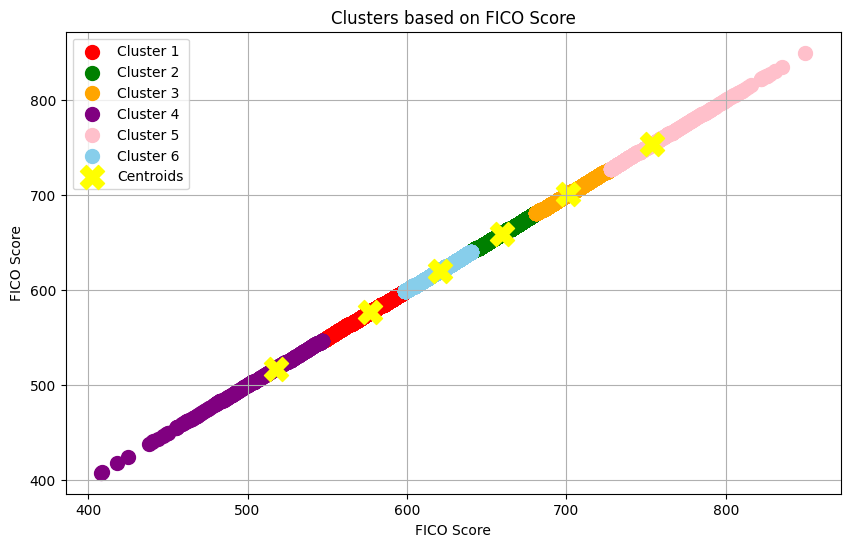

      fico_score  cluster fico_bucket
0            605        5    Bucket 6
1            572        0    Bucket 1
2            602        5    Bucket 6
3            612        5    Bucket 6
4            631        5    Bucket 6
...          ...      ...         ...
9995         697        2    Bucket 3
9996         615        5    Bucket 6
9997         596        0    Bucket 1
9998         647        1    Bucket 2
9999         757        4    Bucket 5

[10000 rows x 3 columns]


In [50]:
# Plot the clusters
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'orange', 'purple', 'pink', 'skyblue']
for i in range(6):
    plt.scatter(df[df['cluster'] == i]['fico_score'], df[df['cluster'] == i]['fico_score'],
                s=100, c=colors[i], label=f'Cluster {i + 1}')

# Plot the centroids
centroids = kmeans.cluster_centers_
plt.scatter(scaler.inverse_transform(centroids)[:, 0], scaler.inverse_transform(centroids)[:, 0],
            s=300, c='yellow', marker='X', label='Centroids')

plt.title('Clusters based on FICO Score')
plt.xlabel('FICO Score')
plt.ylabel('FICO Score')
plt.legend()
plt.grid(True)
plt.show()

# Create FICO score buckets based on clusters
def assign_bucket(cluster_label):
    return f'Bucket {cluster_label + 1}'

df['fico_bucket'] = df['cluster'].apply(assign_bucket)

# Output the resulting DataFrame with FICO score buckets
print(df[['fico_score', 'cluster', 'fico_bucket']])

In [51]:
# Create FICO score buckets based on clusters
def assign_bucket(cluster_label):
    return f'Bucket {cluster_label + 1}'

df['fico_bucket'] = df['cluster'].apply(assign_bucket)

# Get the range of each bucket
bucket_ranges = df.groupby('cluster')['fico_score'].agg(['min', 'max']).sort_index()

# Assign bucket numbers based on sorted cluster centroids
sorted_centroids = sorted(enumerate(kmeans.cluster_centers_), key=lambda x: x[1])
bucket_order = {cluster: i+1 for i, (cluster, _) in enumerate(sorted_centroids)}

bucket_ranges['bucket'] = bucket_ranges.index.map(bucket_order)
bucket_ranges = bucket_ranges.sort_values('bucket').reset_index(drop=True)
bucket_ranges['bucket'] = bucket_ranges['bucket'].apply(lambda x: f'Bucket {x}')

# Display the bucket ranges
print(bucket_ranges)

   min  max    bucket
0  408  547  Bucket 1
1  548  598  Bucket 2
2  599  640  Bucket 3
3  641  680  Bucket 4
4  681  727  Bucket 5
5  728  850  Bucket 6


In [52]:
def categorize_fico(fico):
    if 300 <= fico <= 547:
        return 'Very Poor'
    elif 548 <= fico <= 598:
        return 'Poor'
    elif 599 <= fico <= 640:
        return 'Average'
    elif 641 <= fico <= 680:
        return 'Good'
    elif 681 <= fico <= 727:
        return 'Very Good'
    elif 728 <= fico <= 850:
        return 'Exceptional'
    else:
        return 'Unknown'

df['FICO_Category'] = df['fico_score'].apply(categorize_fico)

In [53]:
df.head(20)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,cluster,fico_bucket,FICO_Category
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0,5,Bucket 6,Average
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1,0,Bucket 1,Poor
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0,5,Bucket 6,Average
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0,5,Bucket 6,Average
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0,5,Bucket 6,Average
5,4661159,0,5376.886873,7189.121298,85529.84591,2,697,0,2,Bucket 3,Very Good
6,8291909,1,3634.057471,7085.980095,68691.57707,6,722,0,2,Bucket 3,Very Good
7,4616950,4,3302.172238,13067.570210,50352.16821,3,545,1,3,Bucket 4,Very Poor
8,3395789,0,2938.325123,1918.404472,53497.37754,4,676,0,1,Bucket 2,Good
9,4045948,0,5396.366774,5298.824524,92349.55399,2,447,0,3,Bucket 4,Very Poor
